In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# display matplotlib plots directly in the notebook, instead of in separate windows.
%matplotlib inline 

# set max command
pd.set_option("display.max_columns", 200)

### Generate Markdown

In [5]:
%run ../helper/generate_markdown.ipynb import generate_markdown_text

generate_markdown_text('5.Unpack the ratings data.')

'5. [Unpack the ratings data.](#-5.Unpack-the-ratings-data.)'

# TED Talks Dataset Exploration

1. [Observe the data.](#-1.Observe-the-data.)
2. [Determine which discussions generate the highest level of online engagement.](#-2.Determine-which-discussions-generate-the-highest-level-of-online-engagement.)
3. [Visualize the distribution of comments.](#-3.Visualize-the-distribution-of-comments.)
4. [Plot the number of talks that took place each year.](#-4.Plot-the-number-of-talks-that-took-place-each-year.)
5. [Unpack the ratings data.](#-5.Unpack-the-ratings-data.)


### 1.Observe the data.

In [6]:
df = pd.read_csv("../data/ted_main.csv")

df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [7]:
df.shape

(2550, 17)

In [8]:
df.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [9]:
# check null values
df.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [10]:
# review the rows with missing speaker_occupation column values 
df.loc[df.speaker_occupation.isnull() == True ]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1113,145,"After a crisis, how can we tell if water is sa...",217,TEDGlobal 2011,1310601600,38,Sonaar Luthra,Sonaar Luthra: Meet the Water Canary,1,1326731605,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TED Fellows', 'design', 'global development'...",Meet the Water Canary,https://www.ted.com/talks/sonaar_luthra_meet_t...,353749
1192,122,"The Pirate Party fights for transparency, anon...",1097,TEDxObserver,1331424000,10,Rick Falkvinge,Rick Falkvinge: I am a pirate,1,1333289675,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'TEDx', 'global issues', 'politic...",I am a pirate,https://www.ted.com/talks/rick_falkvinge_i_am_...,181010
1220,257,"As you surf the Web, information is being coll...",399,TED2012,1330473600,32,Gary Kovacs,Gary Kovacs: Tracking our online trackers,1,1336057219,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'advertising', 'business', 'priva...",Tracking our online trackers,https://www.ted.com/talks/gary_kovacs_tracking...,2098639
1656,140,"In this lovely talk, TED Fellow Ryan Holladay ...",389,TED@BCG San Francisco,1383091200,33,Ryan Holladay,Ryan Holladay: To hear this music you have to ...,1,1389369735,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'entertainment', 'music', 'tec...",To hear this music you have to be there. Liter...,https://www.ted.com/talks/ryan_holladay_to_hea...,1284510
1911,48,What do you do with an outdated encyclopedia i...,366,TEDYouth 2014,1415059200,34,Brian Dettmer,Brian Dettmer: Old books reborn as art,1,1423238442,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TEDYouth', 'art', 'books', 'creativity']",Old books reborn as art,https://www.ted.com/talks/brian_dettmer_old_bo...,1159937
1949,70,Photographer Boniface Mwangi wanted to protest...,440,TEDGlobal 2014,1413763200,33,Boniface Mwangi,Boniface Mwangi: The day I stood up alone,1,1427989423,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'activism', 'art', 'corruption...",The day I stood up alone,https://www.ted.com/talks/boniface_mwangi_boni...,1342431


[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration

## 2.Determine which discussions generate the highest level of online engagement.

In [11]:
# Explore the `comments` column.
df.sort_values('comments', ascending=False).head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764


In [12]:
# Since older talks are naturally likely to have higher comment count, 
# calculate the `comments_per_view` value.
df['comments_per_view'] = df.comments / df.views

In [13]:
df.sort_values('comments_per_view', ascending=False).head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman\n,1832930,0.001360


In [14]:
df.sort_values('comments_per_view', ascending=False)\
    [['title', 'comments', 'views', 'comments_per_view']].head(10)

,title,comments,views,comments_per_view
744,The case for same-sex marriage,649,292395,0.002220
803,E-voting without fraud,834,543551,0.001534
96,Militant atheism,6404,4374792,0.001464
694,Inside a school for suicide bombers,1502,1057238,0.001421
954,Taking imagination seriously,2492,1832930,0.001360
840,On reading the Koran,2374,1847256,0.001285
876,Curating humanity's heritage,555,439180,0.001264
1787,How do you explain consciousness?,2673,2162764,0.001236
661,The danger of science denial,2272,1838628,0.001236
561,Dance to change the world,595,481834,0.001235


In [15]:
# Make it more interperetable by inverting the calculation.
df['views_per_comment'] = df.views / df.comments

In [16]:
df.sort_values('views_per_comment', ascending=False).head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
2534,2,What the astronauts felt when they saw Earth f...,725,TEDxSkoll,1491523200,1,Benjamin Grant,Benjamin Grant: What it feels like to see Eart...,1,1504814438,"[{'id': 10, 'name': 'Inspiring', 'count': 46},...","[{'id': 2511, 'hero': 'https://pe.tedcdn.com/i...",Author,"['TEDx', 'art', 'climate change', 'environment...",What it feels like to see Earth from space,https://www.ted.com/talks/benjamin_grant_what_...,646174,0.000003,323087.000000
2501,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,1488931200,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1,1501770244,"[{'id': 7, 'name': 'Funny', 'count': 10}, {'id...","[{'id': 2479, 'hero': 'https://pe.tedcdn.com/i...",Art editor,"['TEDNYC', 'art', 'creativity', 'culture', 'de...",The stories behind The New Yorker's iconic covers,https://www.ted.com/talks/francoise_mouly_the_...,839040,0.000004,279680.000000
2542,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,1503792000,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,1505488093,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006,180696.000000
2528,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,1465344000,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,1504209631,"[{'id': 9, 'name': 'Ingenious', 'count': 16}, ...","[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207,0.000006,179735.666667
2494,7,Jimmy Lin is developing technologies to catch ...,730,TED2017,1492992000,10,Jimmy Lin,Jimmy Lin: A simple new blood test that can ca...,1,1500994384,"[{'id': 1, 'name': 'Beautiful', 'count': 7}, {...","[{'id': 2498, 'hero': 'https://pe.tedcdn.com/i...",Geneticist,"['DNA', 'TED Fellows', 'biology', 'cancer', 'd...",A simple new blood test that can catch cancer ...,https://www.ted.com/talks/jimmy_lin_a_simple_n...,1005506,0.000007,143643.714286


In [17]:
df.sort_values('views_per_comment', ascending=False)\
    [['title', 'comments', 'views', 'views_per_comment']]\
        .head(10)

,title,comments,views,views_per_comment
2534,What it feels like to see Earth from space,2,646174,323087.000000
2501,The stories behind The New Yorker's iconic covers,3,839040,279680.000000
2542,Living sculptures that stand for history's truths,3,542088,180696.000000
2528,How your pictures can help reclaim lost history,3,539207,179735.666667
2494,A simple new blood test that can catch cancer ...,7,1005506,143643.714286
2313,"""St. James Infirmary Blues""",6,820295,136715.833333
2114,This is what happens when you reply to spam email,150,20475972,136506.480000
2407,"""Turceasca""",5,640734,128146.800000
2392,"Smelfies, and other experiments in synthetic b...",6,760537,126756.166667
2273,The agony of trying to unsubscribe,46,5711833,124170.282609


[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration

## 3.Visualize the distribution of comments.

- `Line plots`: 
    - Best used to visualize trends in data over time or across a continuous variable. 
    - Work by plotting the value of the variable on the y-axis and the corresponding time or other continuous variable on the x-axis, resulting in a line that connects the data points. 
    - Are particularly useful for identifying patterns such as trends, seasonal variations, and cyclical fluctuations.

<AxesSubplot:>

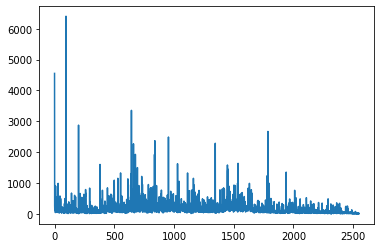

In [18]:
# line plot would not work for this purpose
df.comments.plot()

- `Histograms`: 
    - Best used to visualize the distribution of a single variable, particularly when the variable is continuous or can be grouped into intervals. 
    - Work by dividing the range of the variable into a set of bins and counting the number of observations that fall into each bin. The resulting chart shows the frequency of values in each bin, allowing you to quickly see the shape and spread of the data. 
    - Are particularly useful for identifying patterns in the data such as skewness, multimodality, and outliers.

<AxesSubplot:ylabel='Frequency'>

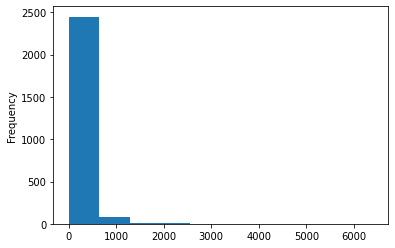

In [19]:
df.comments.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

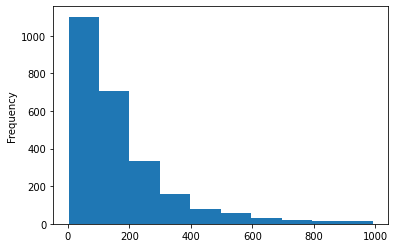

In [20]:
# Filter the comments to make the plot more informative.
df.query('comments <1000').comments.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

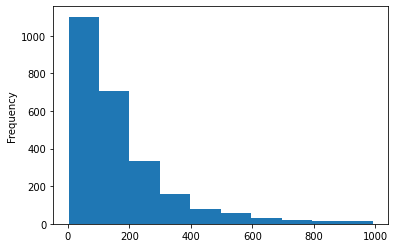

In [21]:
# alternative filtering method using loc accessor
df.loc[df.comments < 1000, 'comments'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

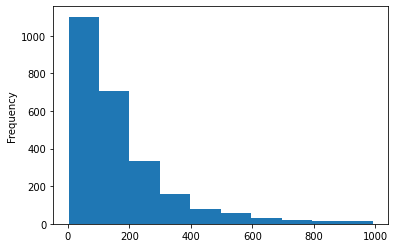

In [22]:
# alternative filtering method
df[df.comments < 1000]['comments'].plot(kind='hist')

In [23]:
# Increase the number of bins to see more details
df.query('comments >= 1000').shape

(32, 19)

<AxesSubplot:ylabel='Frequency'>

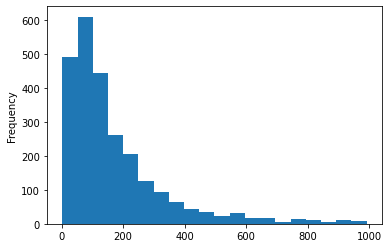

In [24]:
# Increase the number of bins to see more details
df.query('comments < 1000').comments.plot(kind='hist',
                                          bins=20)

[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration

## 4.Plot the number of talks that took place each year.

In [25]:
# event column does not have consistent values for years.
df.event.sample(10)

2298           TED2016
1009    TEDGlobal 2011
512            TED2006
1634    TEDGlobal 2013
1228           TED2012
1856    TEDGlobal 2014
1052    TEDGlobal 2011
469            TED2009
433            TED2009
374            TED2004
Name: event, dtype: object

In [26]:
# film_date column displays the Unix timestamp of the filming.
df.film_date.sample

<bound method NDFrame.sample of 0       1140825600
1       1140825600
2       1140739200
3       1140912000
4       1140566400
           ...    
2545    1496707200
2546    1492992000
2547    1492992000
2548    1499472000
2549    1492992000
Name: film_date, Length: 2550, dtype: int64>

In [27]:
# making the Unix timestamp more human readable with to_datetime() method
pd.to_datetime(df.film_date).head()

0   1970-01-01 00:00:01.140825600
1   1970-01-01 00:00:01.140825600
2   1970-01-01 00:00:01.140739200
3   1970-01-01 00:00:01.140912000
4   1970-01-01 00:00:01.140566400
Name: film_date, dtype: datetime64[ns]

In [28]:
# Need to specify unit as 's' or 'ns'
pd.to_datetime(df.film_date, unit='s').head()

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
Name: film_date, dtype: datetime64[ns]

In [29]:
# save the results as 'film_datetime'
df['film_datetime'] = pd.to_datetime(df.film_date, unit='s')

In [30]:
df[['title', 'film_datetime', 'event']].sample(10)

,title,film_datetime,event
1396,"Pool medical patents, save lives",2012-10-25,TEDxZurich 2012
226,Juggling as art ... and science,2002-03-03,TED2002
537,The 4 ways sound affects us,2009-07-21,TEDGlobal 2009
1430,One second every day,2012-03-02,TED2012
2134,Economic growth has stalled. Let's fix it,2015-12-08,TEDGlobal>Geneva
1819,Wry photos that turn stereotypes upside down,2014-03-20,TED2014
2547,What intelligent machines can learn from a sch...,2017-04-24,TED2017
1841,The simple power of hand-washing,2014-09-10,TED@Unilever
215,Free or cheap Wii Remote hacks,2008-02-28,TED2008
1830,Sanitation is a basic human right,2013-08-14,TED Fellows Retreat 2013


In [31]:
# get the number of talks that took place each year
df.film_datetime.dt.year.value_counts().head(10)

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
Name: film_datetime, dtype: int64

<AxesSubplot:>

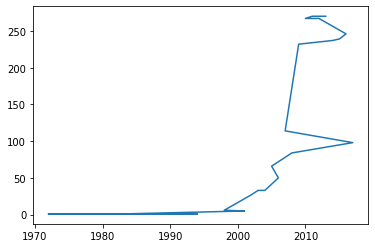

In [32]:
# plot the value counts
# the points are plotted and connected in the order given to the pandas
df.film_datetime.dt.year.value_counts().plot()

<AxesSubplot:>

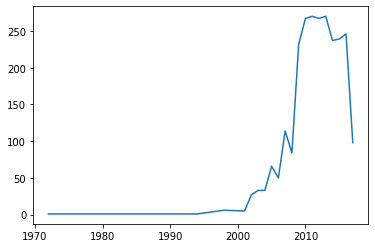

In [33]:
df.film_datetime.dt.year\
    .value_counts()\
    .sort_index()\
    .plot()

<AxesSubplot:>

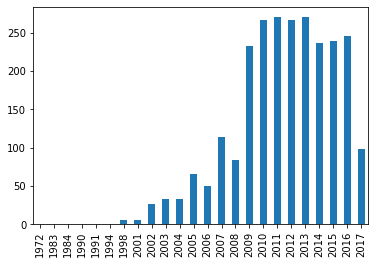

In [34]:
df.film_datetime.dt.year\
    .value_counts()\
    .sort_index()\
    .plot(kind='bar')

In [35]:
# remember that we only have partial data for year 2017 hence the sharp drop in talk count in 2017.
df.film_datetime.max()

Timestamp('2017-08-27 00:00:00')

[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration

## 5.Unpack the ratings data.

In [36]:
# ratings data consist of hashtags that users used to describe a talk 
df.ratings.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [37]:
# notice ratings compose of a list of dict wrapped in a string
df.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [38]:
# Python's built-in ast (Abstract Syntax Tree) library is one way to convert the str into a list
import ast 
output = ast.literal_eval('["a", "b", "c"]')
output

['a', 'b', 'c']

In [39]:
type(output)

list

In [40]:
# sample
ast.literal_eval(df.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [44]:
# option 1: create the function inside the notebook
import ast

def str_to_list(ratings_str):
    return ast.literal_eval(ratings_str)

In [47]:
# option 2: import the function from a module inside the project
from ted_talks import str_to_list

df.ratings.apply(str_to_list).head()


0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [46]:
# option 3: simply use lambda expression for the simple function
df.ratings.apply(lambda x: ast.literal_eval(x)).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [48]:
# option 4: apply the function directly
df.ratings.apply(ast.literal_eval).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [49]:
# creata a column named ratings_list 
df['ratings_list'] = df.ratings.apply(lambda x: ast.literal_eval(x))

In [52]:
type(df.ratings_list[0])

list

In [53]:
# object type may include other Python data types - not just String
df.ratings_list.dtype

dtype('O')

In [54]:
df.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
views_per_comment            float64
film_datetime         datetime64[ns]
ratings_list                  object
dtype: object

[BACK TO TOP][def]

[def]: #-TED-Talks-Dataset-Exploration